# AVL트리 특징
## 1. AVL 트리는 이진 탐색 트리의 속성을 갖는다. (중요)
## 2. 왼쪽, 오른쪽 서브 트리의 높이 차이가 최대 1이다. (중요)
## 3. 어떤 시점에서 높이 차이가 1보다 커지면 회전을 통해 균형을 잡아 높이 차이를 줄인다.
## 4. AVL트리는 높이를 logN으로 유지하기 때문에 삽입, 검색, 삭제의 시간 복잡도는 O(logN)

# 심화 학습: 균형이진탐색트리

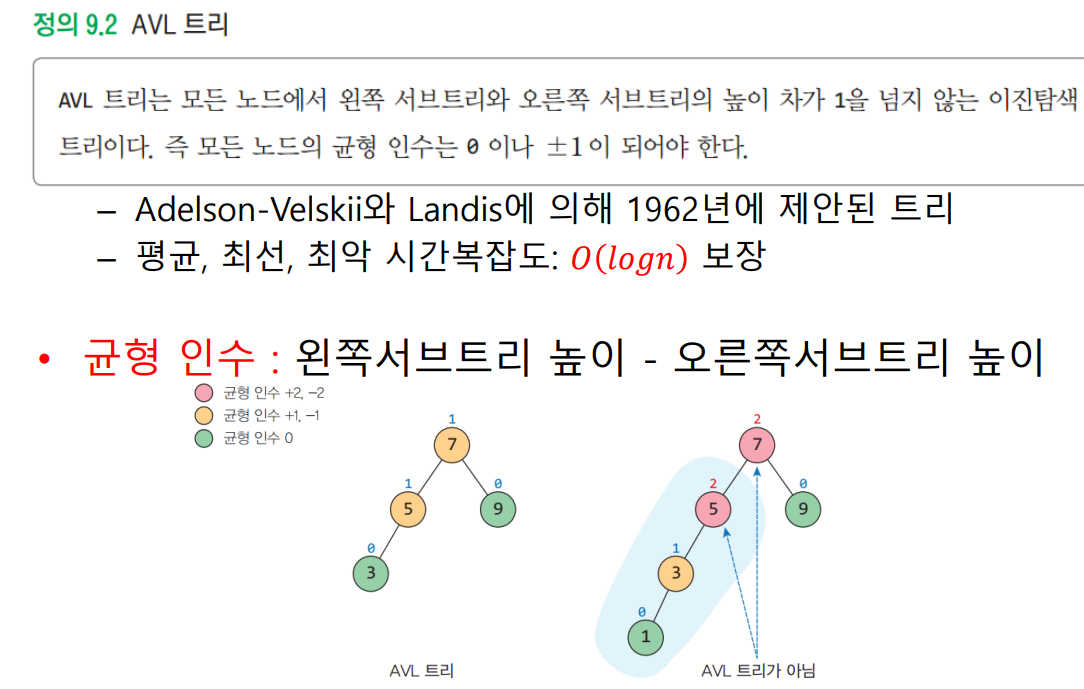

# 균형 인수: 왼쪽서브트리높이-오른쪽서브트리높이

# 탐색연산: 이진트리와 동일

## 삽입과 삭제 시 균형 상태가 깨질 수 있음

# 삽입연산

## 삽입 위치에서 루트까지의 경로에 있는 조상 노드들의 균형 인수에 영향을 미침

## 삽입 후에 불균형 상태로 변한 가장 가까운 조상 노드 (균형 +-가 된 가장 가까운 조상 노드)의 서브 트리들에 대하여 다시 재균형

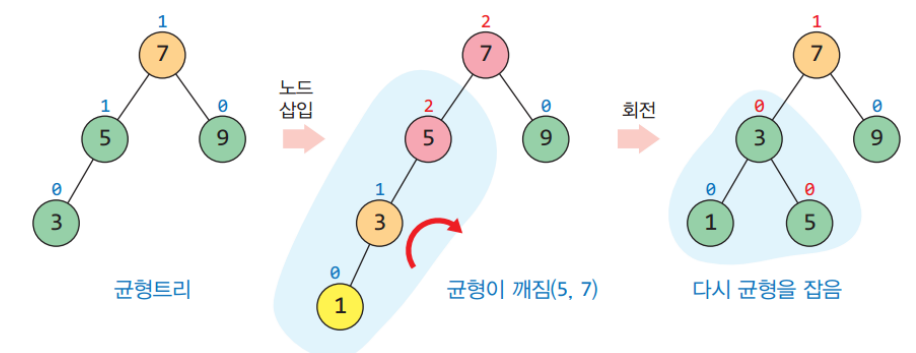

# 균형이 깨지는 4가지 경우
## LL, LR, RL, RR 타입
## 1. LL회전 방법

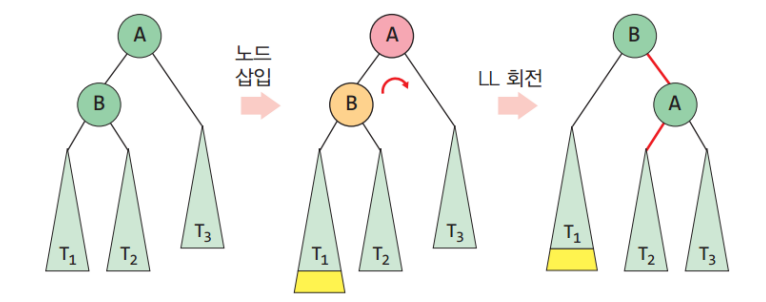

# 2. RR 회전방법

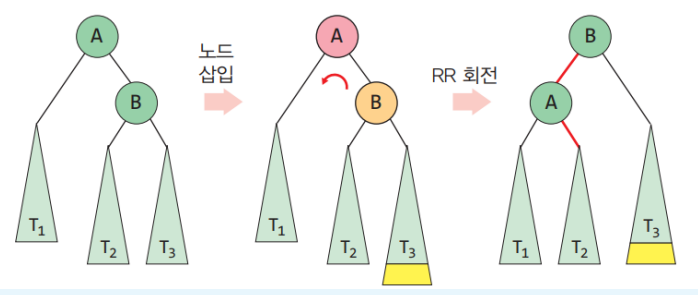

# LR 회전방법

# RL 회전방법

In [14]:
class BSTNode:          
    def __init__ (self, key, value):
        self.key = key
        self.value = value
        self.left = None
        
        self.right = None
def search_bst(n, key) :  #이진탐색 트리(순환함수)
    if n == None :
        return None
    elif key == n.key:
        return n
    elif key < n.key:      
        return search_bst(n.left, key)
    else:               
        return search_bst(n.right, key)
def search_bst_iter(n, key) :   #이진탐색 트리(반복함수)
    while n != None :       
        if key == n.key:      
            return n
        elif key < n.key:       
            n = n.left      
        else:        
            n = n.right       
    return None       
def search_value_bst(n, value) :  # 값을 이용한 탐색
    if n == None : return None
    elif value == n.value:
        return n
    res = search_value_bst(n.left, value) 
    if res is not None :
        return res
    else :
        return search_value_bst(n.right, value)
def search_max_bst(n) :
    while n != None and n.right != None:
        n = n.right
    return n
def search_min_bst(n) :
    while n != None and n.left != None:
        n = n.left
    return n
def insert_bst(r, n) :  #이진탐색 트리 삽입연산(노드 삽입): 순환구조 이용
    if n.key < r.key:
        if r.left is None :
            r.left = n
            return True
        else :
            return insert_bst(r.left, n)
    elif n.key > r.key :
        if r.right is None :
            r.right = n
            return True
        else :
            return insert_bst(r.right, n)
    else :        
        return False
def delete_bst_case1 (parent, node, root) :
    if parent is None:    
        root = None     
    else :
        if parent.left == node : 
            parent.left = None
        else :     
            parent.right = None
    return root          
def delete_bst_case2 (parent, node, root) :
    if node.left is not None :
        child = node.left
    else :
        child = node.right
    if node == root :
        root = child
    else :
        if node is parent.left : 
            parent.left = child
        else :
            parent.right = child
    return root
def delete_bst_case3 (parent, node, root) :
    succp = node
    succ = node.right
    while (succ.left != None) :
        succp = succ
        succ = succ.left
    if (succp.left == succ) :
        succp.left = succ.right
    else :
        succp.right = succ.right
    node.key = succ.key
    node.value= succ.value
    node = succ;      
    return root
def delete_bst (root, key) :
    if root == None : return None   
    parent = None   
    node = root        
    while node != None and node.key != key :
        parent = node
        if key < node.key : node = node.left
        else : node = node.right;
    if node == None : return None   
    if node.left == None and node.right == None:
        root = delete_bst_case1 (parent, node, root)
    elif node.left==None or node.right==None :
        root = delete_bst_case2 (parent, node, root)
    else :
        root = delete_bst_case3 (parent, node, root)
        
        
        
def inorder(n) :
    if n is not None :
        inorder(n.left)
        print(n.key, end=' ')
        inorder(n.right)
class BSTMap():     
    def __init__ (self):
        self.root = None
    def isEmpty (self): return self.root == None
    def clear(self): self.root = None       
    def size(self): return count_node(self.root)
    def search(self, key): return search_bst(self.root, key)
    def searchValue(self, key): return search_value_bst(self.root, key)
    def findMax(self): return search_max_bst(self.root)
    def findMin(self): return search_min_bst(self.root)
    def insert(self, key, value=None):
        n = BSTNode(key, value)  
        if self.isEmpty() :       
            self.root = n   
        else :          
            insert_bst(self.root, n) 
    def delete(self, key):   
        delete_bst (self.root, key)
    def display(self, msg = 'BSTMap :'):
        print(msg, end='')
        inorder(self.root)
        print()

In [15]:
MAX_QSIZE = 10   
class CircularQueue :
    def __init__( self ) :
        self.front = 0
        self.rear = 0
        self.items = [None] * MAX_QSIZE
    def isEmpty( self ) : return self.front == self.rear
    def isFull( self ) : return self.front == (self.rear+1)%MAX_QSIZE
    def clear( self ) : self.front = self.rear
    def enqueue( self, item ):
        if not self.isFull():         
            self.rear = (self.rear+1)% MAX_QSIZE
            self.items[self.rear] = item   
    def dequeue( self ):
        if not self.isEmpty():            
            self.front = (self.front+1)% MAX_QSIZE
            return self.items[self.front]       
    def peek( self ):
        if not self.isEmpty():
            return self.items[(self.front + 1) % MAX_QSIZE]
    def size( self ) :
        return (self.rear - self.front + MAX_QSIZE) % MAX_QSIZE
    def display( self ):
        out = []
        if self.front < self.rear :
            out = self.items[self.front+1:self.rear+1]
        else:
            out = self.items[self.front+1:MAX_QSIZE] \
                + self.items[0:self.rear+1]
        print("[f=%s,r=%d] ==> "%(self.front, self.rear), out)
111111111111111111111111111111111111111111111111111111111
def levelorder(root) :
    queue = CircularQueue()
    queue.enqueue(root)
    while not queue.isEmpty() :
        n = queue.dequeue()
        if n is not None :
            print(n.key, end=' ')
            queue.enqueue(n.left)
            queue.enqueue(n.right)
def count_node(n) :
    if n is None : 
        return 0
    else : 
        return 1 + count_node(n.left) + count_node(n.right)
def calc_height(n) :
    if n is None : 
        return 0
    hLeft = calc_height(n.left)
    hRight = calc_height(n.right)
    if (hLeft > hRight) : 
        return hLeft + 1
    else: 
        return hRight + 1
def count_leaf(n) :
    if n is None :
        return 0
    elif n.left is None and n.right is None :
        return 1
    else : 
        return count_leaf(n.left) + count_leaf(n.right)

In [16]:
def rotateLL(A) :
    B = A.left  
    A.left = B.right
    B.right = A
    return B
def rotateRR(A) :
    B = A.right   
    A.right = B.left
    B.left = A
    return B
def rotateRL(A) :
    B = A.right
    A.right = rotateLL(B)
    return rotateRR(A)
def rotateLR(A) :
    B = A.left
    A.left = rotateRR(B)
    return rotateLL(A)
def calc_height_diff(n) :
    if n==None :
        return 0
    return calc_height(n.left) - calc_height(n.right)
def reBalance (parent) :
    hDiff = calc_height_diff(parent)
    if hDiff > 1 :
        if calc_height_diff( parent.left ) > 0 :
            parent = rotateLL( parent )
        else :
            parent = rotateLR( parent )
    elif hDiff < -1 :
        if calc_height_diff( parent.right ) < 0 :
            parent = rotateRR( parent )
        else :
            parent = rotateRL( parent )
    return parent
def insert_avl(parent, node) :
    if node.key < parent.key :
        if parent.left != None :
            parent.left = insert_avl(parent.left, node)
        else :
            parent.left = node
        return reBalance(parent)
    elif node.key > parent.key :
        if parent.right != None :
            parent.right = insert_avl(parent.right, node)
        else :
            parent.right = node
        return reBalance(parent)
    else :
        print("중복된 키 에러")

In [17]:
class AVLMap(BSTMap):
    def __init__ (self):
        super().__init__()
    def insert(self, key, value=None):
        n = BSTNode(key, value)
        if self.isEmpty() :
            self.root = n
        else :
            self.root = insert_avl(self.root, n)
    def display(self, msg = 'AVLMap :'):
        print(msg, end='')
        levelorder(self.root)
        print()
node = [7,8,9,2,1,5,3,6,4]  
#node = [1,2,3,4,5,6,7,8,9]
map = AVLMap()
#map = BSTMap()
for i in node :
    map.insert(i)
    map.display("AVL(%d): "%i)
    #map.display("BST(%d): "%i)
print(" 노드의 개수 = %d" % count_node( map.root ))
print(" 단말의 개수 = %d" % count_leaf( map.root ))
print(" 트리의 높이 = %d" % calc_height( map.root ))

AVL(7): 7 
AVL(8): 7 8 
AVL(9): 8 7 9 
AVL(2): 8 7 9 2 
AVL(1): 8 2 9 1 7 
AVL(5): 7 2 8 1 5 9 
AVL(3): 7 2 8 1 5 9 3 
AVL(6): 7 2 8 1 5 9 3 6 
AVL(4): 7 3 8 2 5 9 1 4 6 
 노드의 개수 = 9
 단말의 개수 = 4
 트리의 높이 = 4


## 오일러 문제 (1800년대)
- 다리를 한번만 건너서 처음 출발했던 장소로 돌아오는 문제
    - 위치: 정점(node), 다리: 간선(edge)
- 오일러 정리
- 모든 정점에 연결된 간선의 수가 짝수이면 오일러 경로 존재함
- 따라서 그래프에는 오일러 경로가 존재하지 않음

## 그래프 G는 (V, E)로 표시
- 정점(vertices) 또는 노드(node)
- 간선(edge) 또는 링크(link): 정점들 간의 관계 의미
V(G)는 그래프 G의 정점(객체)들의 집합  
E(G)는 그래프 G의 간선들의 집합

# 두 그래프는 시각적으로 다르지만 실제로는 동일한 그래프
### 같은 객체들을 가지고 객체들 간의 관계도 정확히 일치
# 1. 그래프의 종류 (간선의 종류에 따라)
### 무방향 그래프
(A,B) = (B,A)

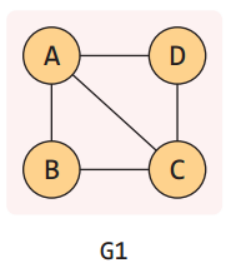

### 방향 그래프
<A,B> =! <B, A>
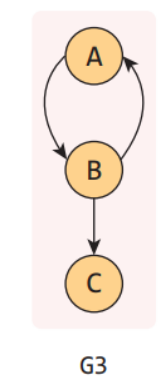

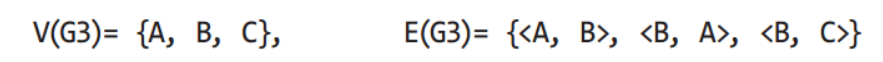

# 가중치 그래프, 네크워크
간선에 비용이나 가중치가 할당된 그래프
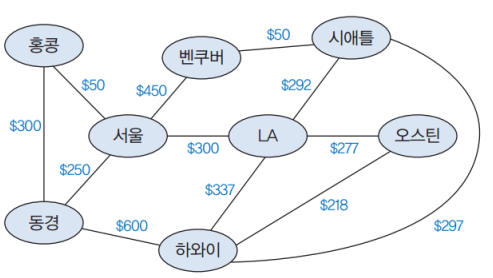

# 부분 그래프 
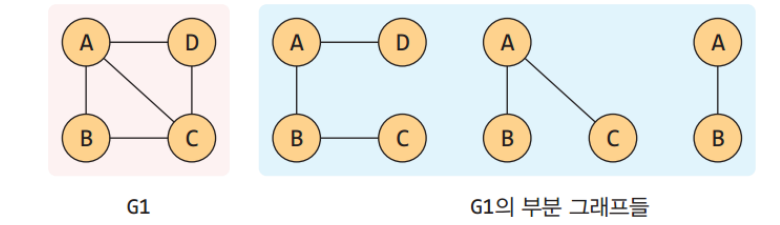

# 2. 그래프 용어
## 인접 정점: 간선에 의해 직접 연결된 정점
## 정점의 차수(degree)
정점에 연결된 간선의 수(G1의 정점 A는 차수가 3)  
무방향 그래프: 모든 정점 차수의 합은 간선 수의 2배(G1의 모든 정점 차수 10, 간선은 5)  
방향 그래프: 진입차수, 진출차수, 모든 진입(진출)차수의 합은 간선의 수
## 그래프의 경로(path): 간선을 따라 갈 수 있는 길
G1에서 A,B,C,D는 경로 X
왜냐하면 간선 (B,D)가 존재X

## 경로의 길이(length)
경로를 구성하는데 사용된 간선의 수  

## 단순 경로(simple path)

## 사이클

## 연결 그래프

## 트리

## 완전 그래프


# 그래프 표현
A.인접 행렬을 이용한 표현  
B.인접 리스트를 이용한 표현  
C.인접 행렬과 인접 리스트의 복잡도 비교  
D.파이썬을 이용한 그래프의 인접 행렬 표현  
E.파이썬을 이용한 그래프의 인접 리스트 표현  

## A. 인접 행렬을 이용한 표현
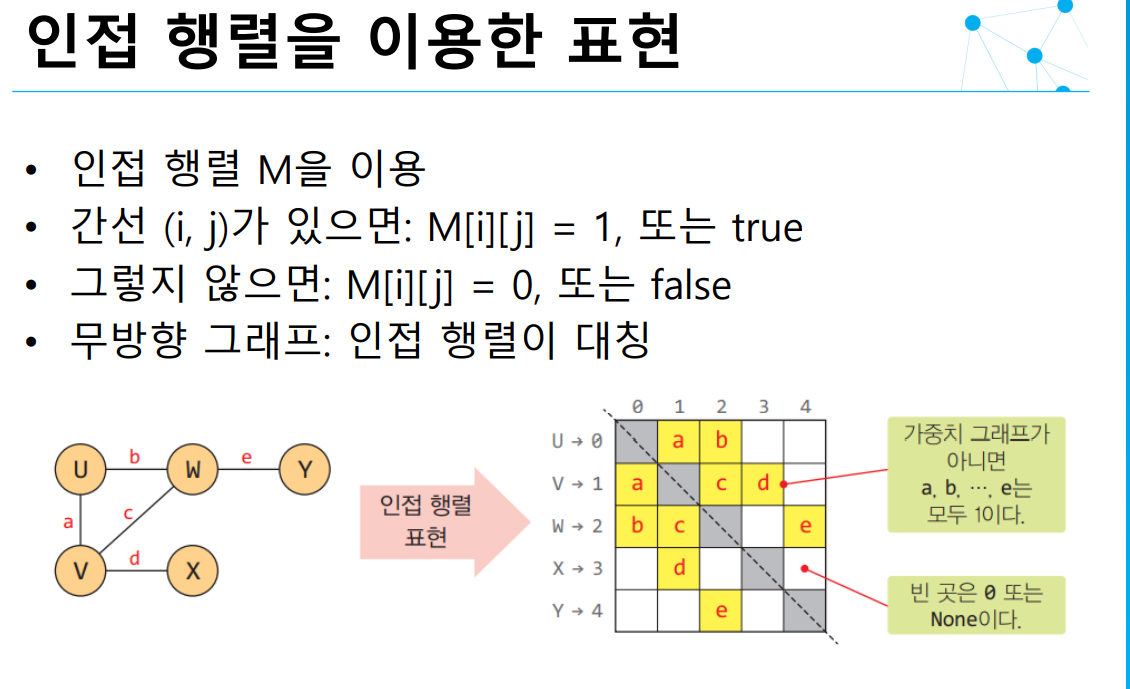

## B. 인접 리스트를 이용한 표현
- 무방향: 실제로 만들어지는 노드의 수는 간선의 수 2배
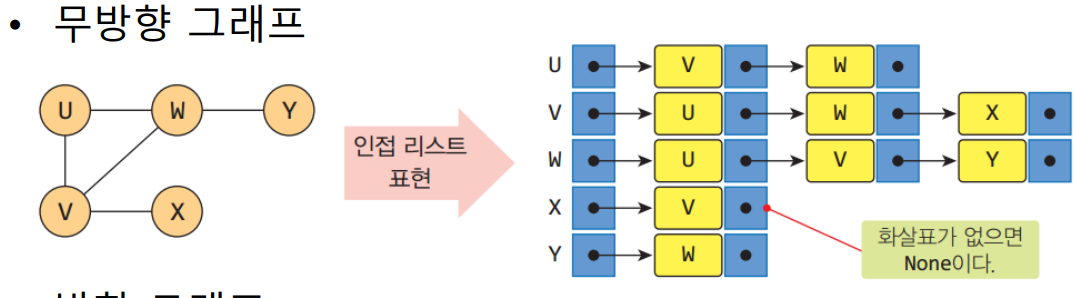
방향: 실제로 만들어지는 도드의 수는 간선의 수와 같음

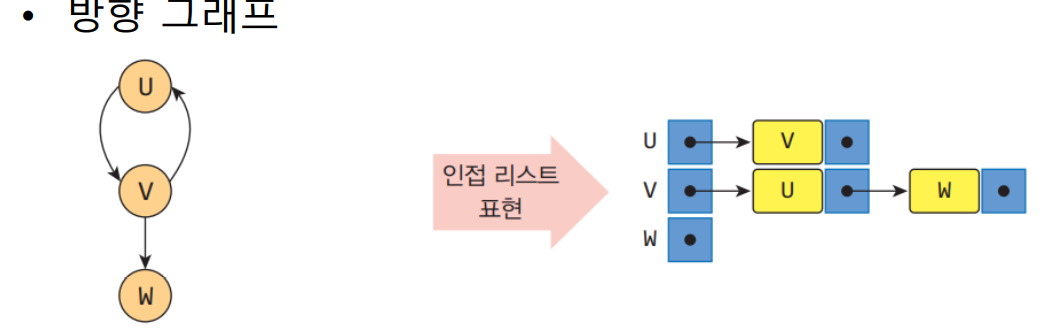